In [1]:
!pip install -q pandas matplotlib seaborn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12,6)
sns.set(style="whitegrid")


In [3]:
BASE = "/Users/brianbruce/Desktop/jordan_vs_lebron"

jordan_career   = pd.read_csv(f"{BASE}/jordan_career.csv")
lebron_career   = pd.read_csv(f"{BASE}/lebron_career.csv")
jordan_playoffs = pd.read_csv(f"{BASE}/jordan_playoffs.csv")
lebron_playoffs = pd.read_csv(f"{BASE}/lebron_playoffs.csv")

# Label players
jordan_career["Player"] = "Michael Jordan"
lebron_career["Player"] = "LeBron James"
jordan_playoffs["Player"] = "Michael Jordan"
lebron_playoffs["Player"] = "LeBron James"

# Combine
career   = pd.concat([jordan_career, lebron_career], ignore_index=True)
playoffs = pd.concat([jordan_playoffs, lebron_playoffs], ignore_index=True)

career.head(), playoffs.head()


(   game        date     age team  opp   result  mp  fg  fga    fgp  ...  drb  \
 0     1  1984-10-26  21-252  CHI  WSB  W (+16)  40   5   16  0.313  ...    5   
 1     2  1984-10-27  21-253  CHI  MIL   L (-2)  34   8   13  0.615  ...    2   
 2     3  1984-10-29  21-255  CHI  MIL   W (+6)  34  13   24  0.542  ...    2   
 3     4  1984-10-30  21-256  CHI  KCK   W (+5)  36   8   21  0.381  ...    2   
 4     5  1984-11-01  21-258  CHI  DEN  L (-16)  33   7   15  0.467  ...    2   
 
    trb  ast  stl  blk  tov  pts  game_score  plus_minus          Player  
 0    6    7    2    4    5   16        12.5         NaN  Michael Jordan  
 1    5    5    2    1    3   21        19.4         NaN  Michael Jordan  
 2    4    5    6    2    3   37        32.9         NaN  Michael Jordan  
 3    4    5    3    1    6   25        14.7         NaN  Michael Jordan  
 4    5    5    1    1    2   17        13.2         NaN  Michael Jordan  
 
 [5 rows x 27 columns],
    game        date series  series_

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE = "/Users/brianbruce/Desktop/jordan_vs_lebron"  # update if needed

j_c = pd.read_csv(f"{BASE}/jordan_career.csv")
l_c = pd.read_csv(f"{BASE}/lebron_career.csv")
j_p = pd.read_csv(f"{BASE}/jordan_playoffs.csv")
l_p = pd.read_csv(f"{BASE}/lebron_playoffs.csv")

# label players
j_c["Player"] = "Michael Jordan";  j_p["Player"] = "Michael Jordan"
l_c["Player"] = "LeBron James";    l_p["Player"] = "LeBron James"

career   = pd.concat([j_c, l_c], ignore_index=True)
playoffs = pd.concat([j_p, l_p], ignore_index=True)


In [5]:
# --- dates to datetime & add Season ---
for df in (career, playoffs):
    if "date" in df.columns:
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
        df["Season"] = df["date"].dt.year

# --- minutes played to numeric (minutes as float) ---
def to_minutes(x):
    # accepts "mm" or "mm:ss"
    if pd.isna(x): return None
    s = str(x)
    if ":" in s:
        mm, ss = s.split(":")
        return int(mm) + int(ss)/60
    try:
        return float(s)
    except:
        return None

for df in (career, playoffs):
    if "mp" in df.columns:
        df["mp_min"] = df["mp"].apply(to_minutes)

# --- make sure numeric columns are numeric ---
num_cols = ["fg","fga","fgp","drb","trb","ast","stl","blk","tov","pts","game_score","plus_minus"]
for df in (career, playoffs):
    for c in num_cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")


In [6]:
# Regular season per-game
career_pg = (career
    .groupby(["Player","Season"], as_index=False)
    .agg(
        GP    = ("game","count"),
        MPG   = ("mp_min","mean"),
        PPG   = ("pts","mean"),
        RPG   = ("trb","mean"),
        APG   = ("ast","mean"),
        SPG   = ("stl","mean"),
        BPG   = ("blk","mean"),
        TOVpg = ("tov","mean"),
        FGpct = ("fgp","mean")  # already in 0–1 per your sample
    )
)

# Playoff per-game
playoff_pg = (playoffs
    .groupby(["Player","Season"], as_index=False)
    .agg(
        GP    = ("game","count"),
        MPG   = ("mp_min","mean"),
        PPG   = ("pts","mean"),
        RPG   = ("trb","mean"),
        APG   = ("ast","mean"),
        SPG   = ("stl","mean"),
        BPG   = ("blk","mean"),
        TOVpg = ("tov","mean"),
        FGpct = ("fgp","mean")
    )
)


In [7]:
career_totals = (career
    .groupby("Player", as_index=False)
    .agg(
        GP   = ("game","count"),
        MIN  = ("mp_min","sum"),
        PTS  = ("pts","sum"),
        REB  = ("trb","sum"),
        AST  = ("ast","sum"),
        STL  = ("stl","sum"),
        BLK  = ("blk","sum"),
        TOV  = ("tov","sum")
    )
)

career_avgs = (career
    .groupby("Player", as_index=False)
    .agg(
        MPG   = ("mp_min","mean"),
        PPG   = ("pts","mean"),
        RPG   = ("trb","mean"),
        APG   = ("ast","mean"),
        SPG   = ("stl","mean"),
        BPG   = ("blk","mean"),
        TOVpg = ("tov","mean"),
        FGpct = ("fgp","mean")
    )
)
career_totals, career_avgs


(           Player    GP      MIN    PTS   REB   AST   STL  BLK   TOV
 0    LeBron James  1265  48570.0  34241  9405  9346  2015  957  4424
 1  Michael Jordan  1072  41013.0  32292  6672  5633  2514  893  2924,
            Player        MPG        PPG       RPG       APG       SPG  \
 0    LeBron James  38.395257  27.067984  7.434783  7.388142  1.592885   
 1  Michael Jordan  38.258396  30.123134  6.223881  5.254664  2.345149   
 
         BPG     TOVpg     FGpct  
 0  0.756522  3.497233  0.504983  
 1  0.833022  2.727612  0.495741  )

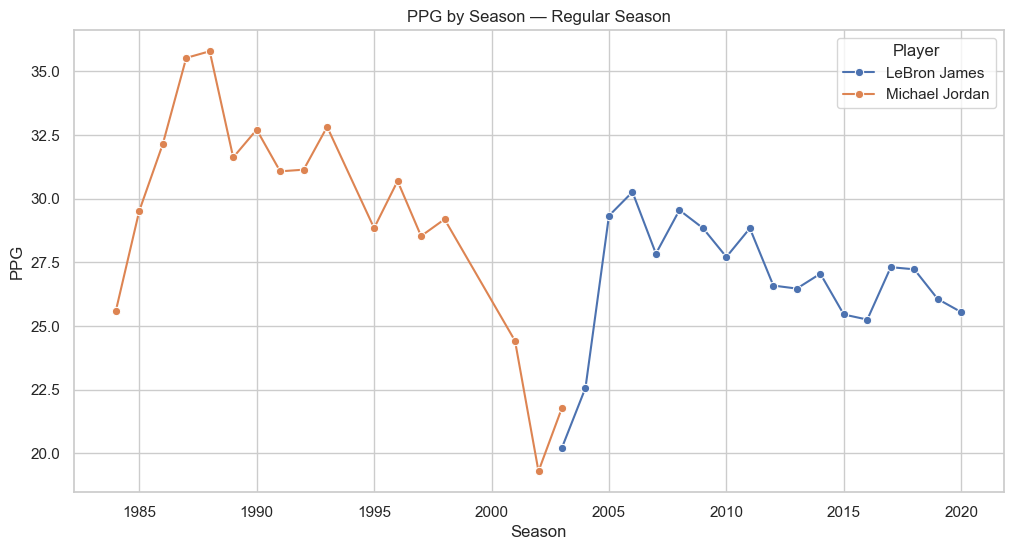

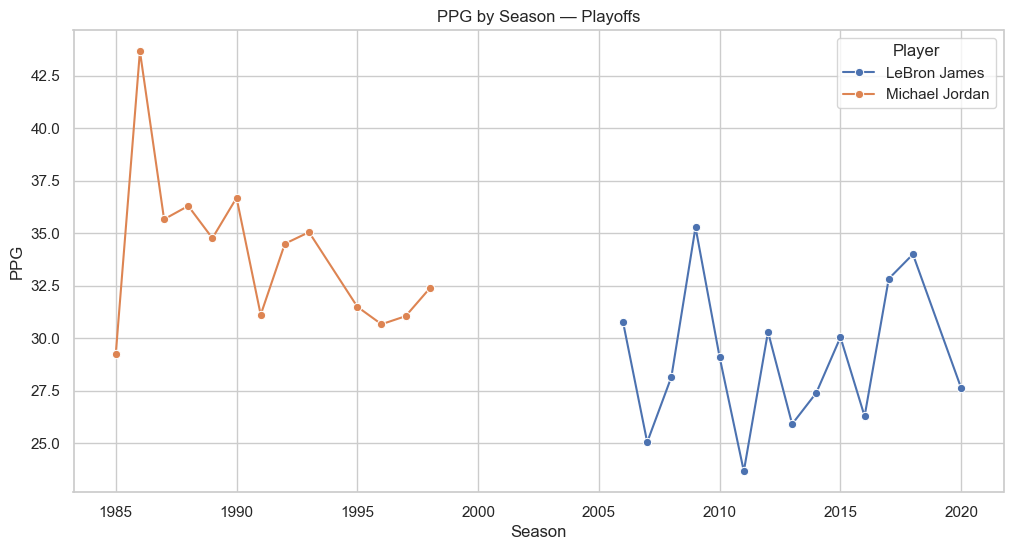

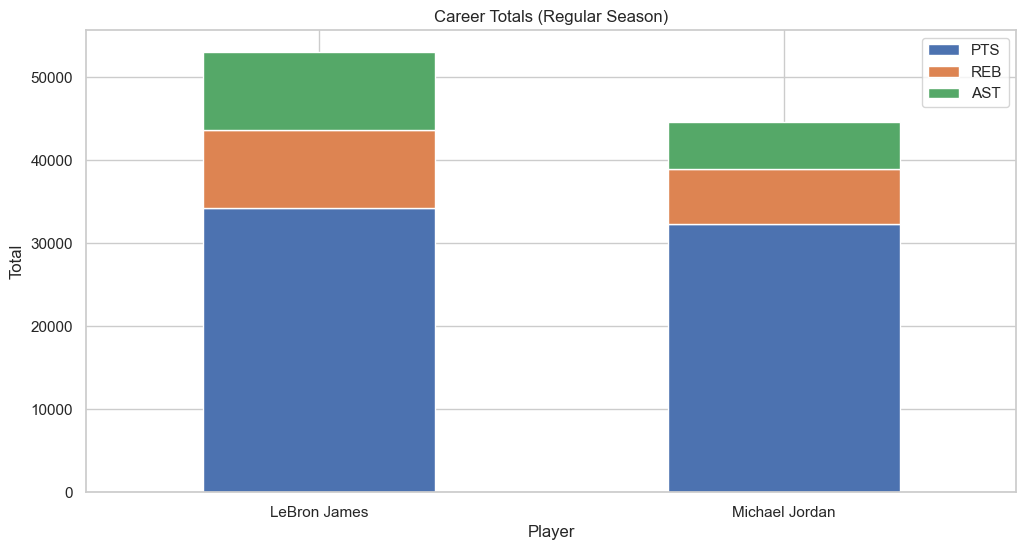

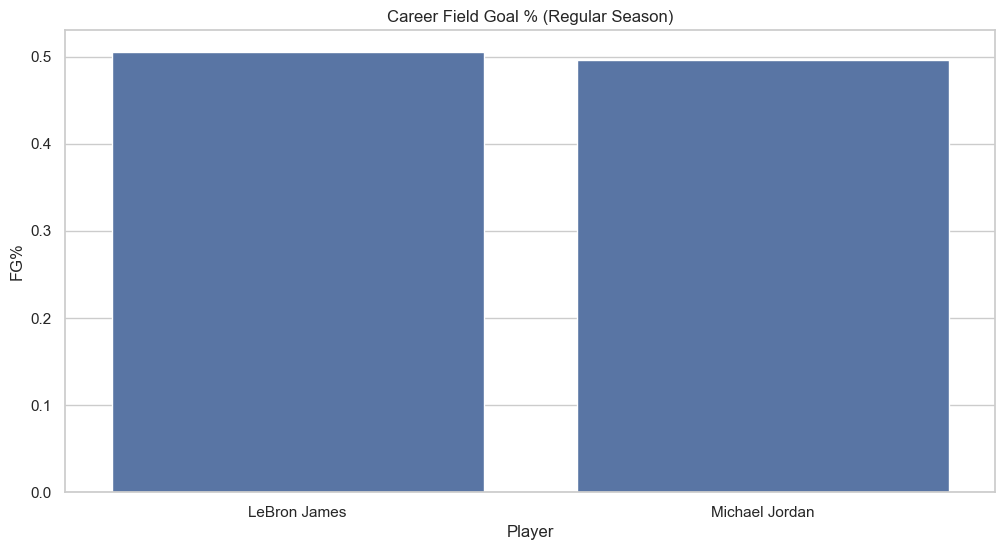

In [8]:
sns.lineplot(data=career_pg, x="Season", y="PPG", hue="Player", marker="o")
plt.title("PPG by Season — Regular Season"); plt.show()

sns.lineplot(data=playoff_pg, x="Season", y="PPG", hue="Player", marker="o")
plt.title("PPG by Season — Playoffs"); plt.show()

ax = career_totals.set_index("Player")[["PTS","REB","AST"]].plot(kind="bar", stacked=True)
plt.title("Career Totals (Regular Season)"); plt.ylabel("Total"); plt.xticks(rotation=0); plt.show()

sns.barplot(data=career_avgs, x="Player", y="FGpct")
plt.title("Career Field Goal % (Regular Season)"); plt.ylabel("FG%"); plt.show()


In [9]:
career.to_csv(f"{BASE}/clean_career_games.csv", index=False)
playoffs.to_csv(f"{BASE}/clean_playoff_games.csv", index=False)

career_pg.to_csv(f"{BASE}/career_season_averages.csv", index=False)
playoff_pg.to_csv(f"{BASE}/playoff_season_averages.csv", index=False)

career_totals.to_csv(f"{BASE}/career_totals.csv", index=False)
career_avgs.to_csv(f"{BASE}/career_averages.csv", index=False)
